# 1830년 프랑스의 사회인구학적 데이터 분석

In [1]:
# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
# Jupyter Notebook에서 Matplotlib 출력을 위한 설정
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False)
# Matplotlib 출력 크기 설정
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

## 1830년도 프랑스의 사회인구학적 데이터

-주요 변수
Literacy: 문해율  
Crime_prop: 재산범죄당 인구
Wealth: 재산세 순위
Distance: 수도 파리까지의 거리(km)

In [6]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
df_data = pd.read_csv(url)
df_data = pd.read_csv(url, index_col=0)
# `index_col=0`은 첫 열을 index로 지정

데이터의 개략적인 확인

In [7]:
df_data.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
1,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
2,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
3,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


주요 변수(재산범죄, 문해율, 재산순위, 수도까지의 거리)에 대한 데이터 프레임 생성

In [11]:
df_data.dropna(inplace=True)

In [12]:
df_data2 = df_data[['Crime_prop', 'Literacy', 'Wealth', 'Distance']]
df_data2.head()

,Crime_prop,Literacy,Wealth,Distance
1,15890,37,73,218.372
2,5521,51,22,65.945
3,7925,13,61,161.927
4,7289,46,76,351.399
5,8174,69,83,320.280


변수별 회귀계수 산출

In [53]:
import statsmodels.api as sm
from pandas.core import datetools
import statsmodels.formula.api as smf

문해율, 재산순위, 수도까지의 거리가 재산범죄에 미치는 영향 파악

In [54]:
res = smf.ols(formula='Crime_prop ~ Literacy + Wealth + Distance', data=df_data).fit()
res

분석 요약

In [55]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime_prop   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     10.33
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           7.74e-06
Time:                        08:10:42   Log-Likelihood:                -797.75
No. Observations:                  86   AIC:                             1604.
Df Residuals:                      82   BIC:                             1613.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7393.2658   1141.254      6.478      0.0

In [ ]:
### 시각화
각 변수에 대한 재산범죄의 관계를 시각화

In [56]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

1X3 subplot 생성
regplot() -> 선형회귀모형 그래프

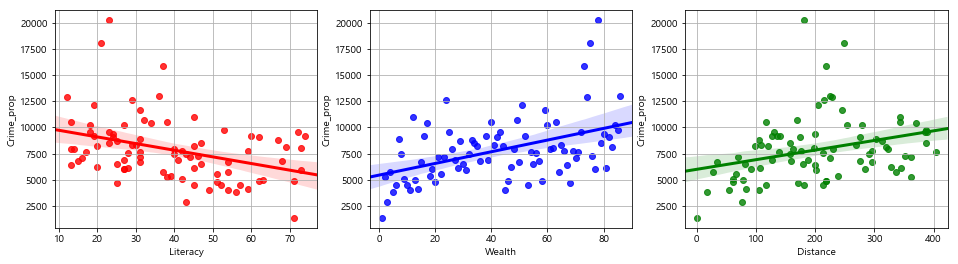

In [13]:
plt.rcParams["figure.figsize"] = (16,4)
plt.subplot(1, 3, 1)   # 1 x 3 그래프 배열에서 첫 번째 그래프
sns.regplot('Literacy', 'Crime_prop', df_data, color='red')
plt.subplot(1, 3, 2)   # 1 x 3 그래프 배열에서 두 번째 그래프
sns.regplot('Wealth', 'Crime_prop', df_data, color='blue')
plt.subplot(1, 3, 3)   # 1 x 3 그래프 배열에서 세 번째 그래프
sns.regplot('Distance', 'Crime_prop', df_data, color='green')

문해율과 재산범죄당 인구
재산수준와 ...
수도까지의 거리와...

데이터 프레임에서의 plot 작성

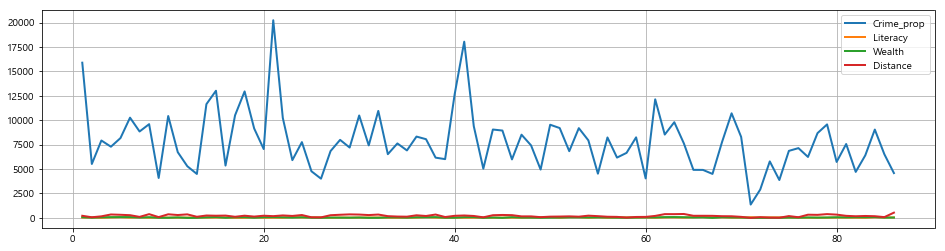

In [66]:
df_data2.plot(kind='line')

kind 인수는 기본값이 LIne

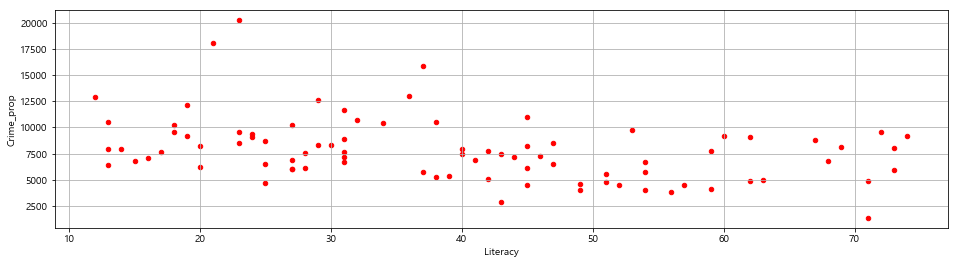

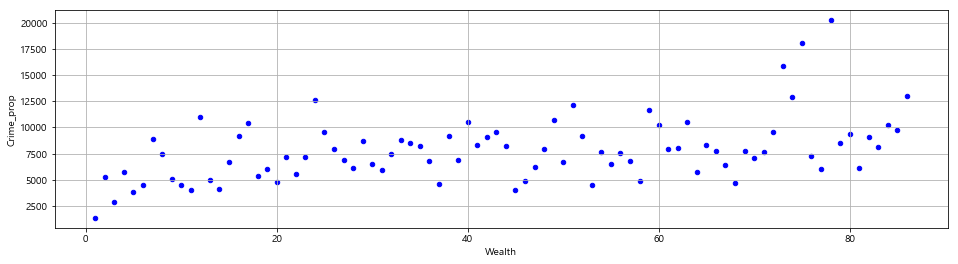

In [71]:
df_data2.plot('Literacy', 'Crime_prop', kind='scatter',color='red')
df_data2.plot('Wealth', 'Crime_prop', kind='scatter', color='blue')

##### End of Document